In [1]:
import numpy as np
import matplotlib.pyplot as plt
import run_simple_energy_loss

#### Next we will load the simulation. 
 - It will take a numpy array with dimension M x N as input.
    - M number of design points
    - N number of model parameters of the model
 - It will return a M x P numpy array.
     - M number of design points
     - P number of Momentem bins

In [2]:
simulation=run_simple_energy_loss.run_simulation

#### Make a design matrix

There are 4 parameters currently taken as model parameters. 
 - Initialization
     - T0_in_GeV (deafult value 0.3)
     - tau0 (deafult value 0.2)
     - Tf_in_GeV (deafult value 0.15)
 - Parton Energy loss rates
     - alpha_s (deafult value 0.1)

In [3]:
hbarc=0.1973
n_design = 5

In [4]:
# design for alpha_s parameter
T0_in_fm = np.full((n_design,1), 0.3)
tau0 = np.full((n_design,1), 0.2)
Tf_in_fm = np.full((n_design,1), 0.15)

# We will only consider the change in modle parameter for now
alpha_s = np.linspace(0.01,1,n_design).reshape(-1,1)

#N_f = np.full((n_design,1), 0)
#N_c = np.full((n_design,1), 3)

design = np.vstack([T0_in_fm.T, tau0.T, Tf_in_fm.T, alpha_s.T])

# design matrix has to have M by N shape. Rows should be design points

design = design.T
print(f'Shape of the design is {design.shape}')

Shape of the design is (5, 4)


#### Run simulation for the 20 design points

In [5]:
observables=simulation(design)

Working on 0/5 designs


/Users/dananjayaliyanage/miniconda3/envs/sensitivity/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_euler.py:73: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_quad2b=scipy.integrate.quad(lambda u, p=p: p*integrand_middle(p,u), 0, delta, limit=npts, epsabs=epsabs, epsrel=epsrel)
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_euler.py:68: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_quad2a=scipy.integrate.quad(vec_integrand, pmin, p, limit=npts, epsabs=epsabs, epsrel=epsrel)


Working on 1/5 designs
Working on 2/5 designs
Working on 3/5 designs
Working on 4/5 designs
Shape of the result array is (5, 20)


In [6]:
observables

array([[1.00004420e+00, 1.00011673e+00, 9.99470097e-01, 9.99204802e-01,
        9.99065104e-01, 9.98983493e-01, 9.98933470e-01, 9.98902394e-01,
        9.98883327e-01, 9.98872268e-01, 9.98866710e-01, 9.98864957e-01,
        9.98865863e-01, 9.98868700e-01, 9.98872658e-01, 9.98877155e-01,
        9.98881536e-01, 9.98883932e-01, 9.98881124e-01, 9.98869327e-01],
       [1.02845000e+00, 1.07545932e+00, 7.00738717e-01, 5.87116846e-01,
        5.34816100e-01, 5.06476272e-01, 4.89905157e-01, 4.79937720e-01,
        4.73974955e-01, 4.70600876e-01, 4.68966609e-01, 4.68516387e-01,
        4.68878320e-01, 4.69807107e-01, 4.71040457e-01, 4.72340540e-01,
        4.73464626e-01, 4.73834948e-01, 4.72603413e-01, 4.68873085e-01],
       [1.10206729e+00, 1.28464815e+00, 2.44766102e-01, 1.22141919e-01,
        8.45684956e-02, 6.83097224e-02, 6.00423564e-02, 5.55219379e-02,
        5.30128758e-02, 5.16961399e-02, 5.11302175e-02, 5.10466955e-02,
        5.12683109e-02, 5.16672213e-02, 5.21117002e-02, 5.2473

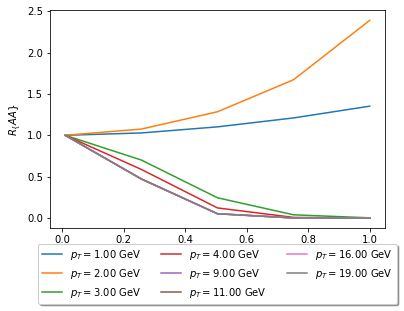

In [21]:
# Plot the observables
show_obs=[0,1,2,3,8,10,15,18]
design_alpha=alpha_s.T
pt_list = np.linspace(1,20,20)
fig, ax = plt.subplots()
for i,pT in enumerate(pt_list):
    if i in show_obs:
        ax.plot(design_alpha.flatten(),observables[:,i], label=r'$p_T =$' +f'{pT:.2f} GeV')

ax.set_xlabel(r'$\alpha_s$')
ax.set_ylabel(r'$R_\{AA\}$')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=3)